In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [4]:
data 
#checking the data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
data.dropna(inplace=True)
#dealing with non-null data

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [21]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [23]:
X_train , X_test , y_train , y_test =  train_test_split(X, y, test_size=0.2)

In [25]:
train_data = X_train.join(y_train)

In [27]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9666,-120.55,41.61,22.0,9047.0,1831.0,4276.0,1622.0,2.0802,INLAND,47900.0
2693,-115.39,32.76,16.0,1136.0,196.0,481.0,185.0,6.2558,INLAND,146300.0
4777,-118.33,34.03,33.0,2314.0,624.0,1714.0,582.0,1.7377,<1H OCEAN,183900.0
14203,-117.05,32.69,8.0,831.0,158.0,740.0,154.0,5.3908,NEAR OCEAN,165500.0
16766,-122.48,37.69,33.0,2347.0,512.0,1259.0,481.0,3.4492,NEAR OCEAN,264300.0
...,...,...,...,...,...,...,...,...,...,...
2551,-124.16,40.77,35.0,2141.0,438.0,1053.0,434.0,2.8529,NEAR OCEAN,85600.0
10547,-117.77,33.71,15.0,2102.0,295.0,1060.0,303.0,7.3141,<1H OCEAN,337100.0
580,-122.07,37.71,36.0,2879.0,480.0,1235.0,455.0,4.9801,NEAR BAY,241500.0
3870,-118.46,34.16,26.0,2548.0,647.0,1098.0,540.0,4.3839,<1H OCEAN,299100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

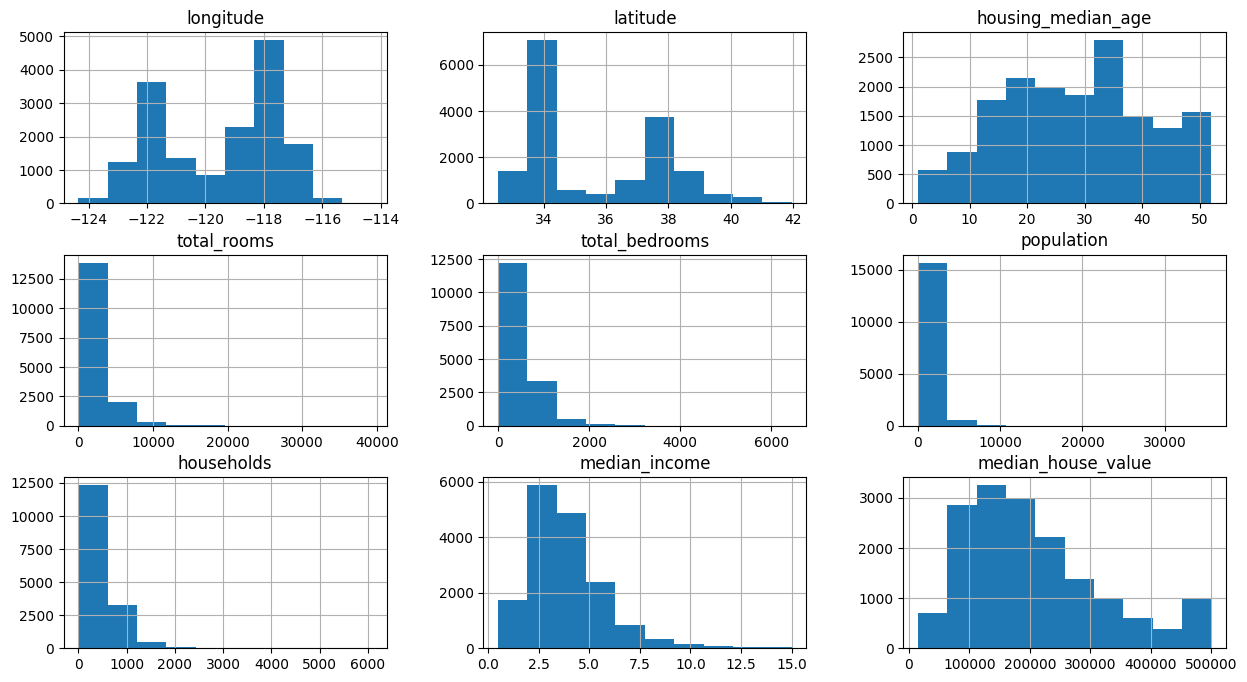

In [31]:
train_data.hist(figsize=(15,8))

<Axes: >

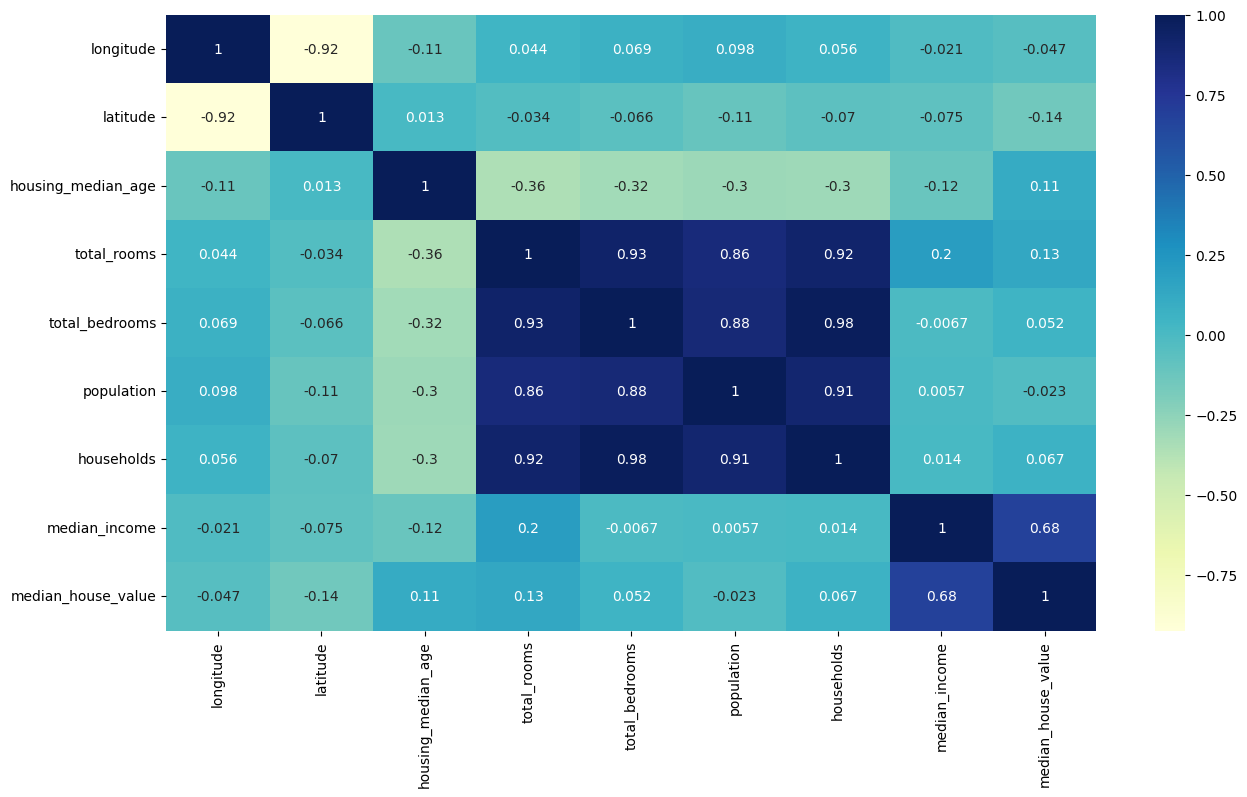

In [43]:
numeric_columns = train_data.select_dtypes(include=['number'])
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="YlGnBu")

In [57]:
train_data['total_rooms']= np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms']= np.log(train_data['total_bedrooms'] + 1)
train_data['population']= np.log(train_data['population'] + 1)
train_data['households']= np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

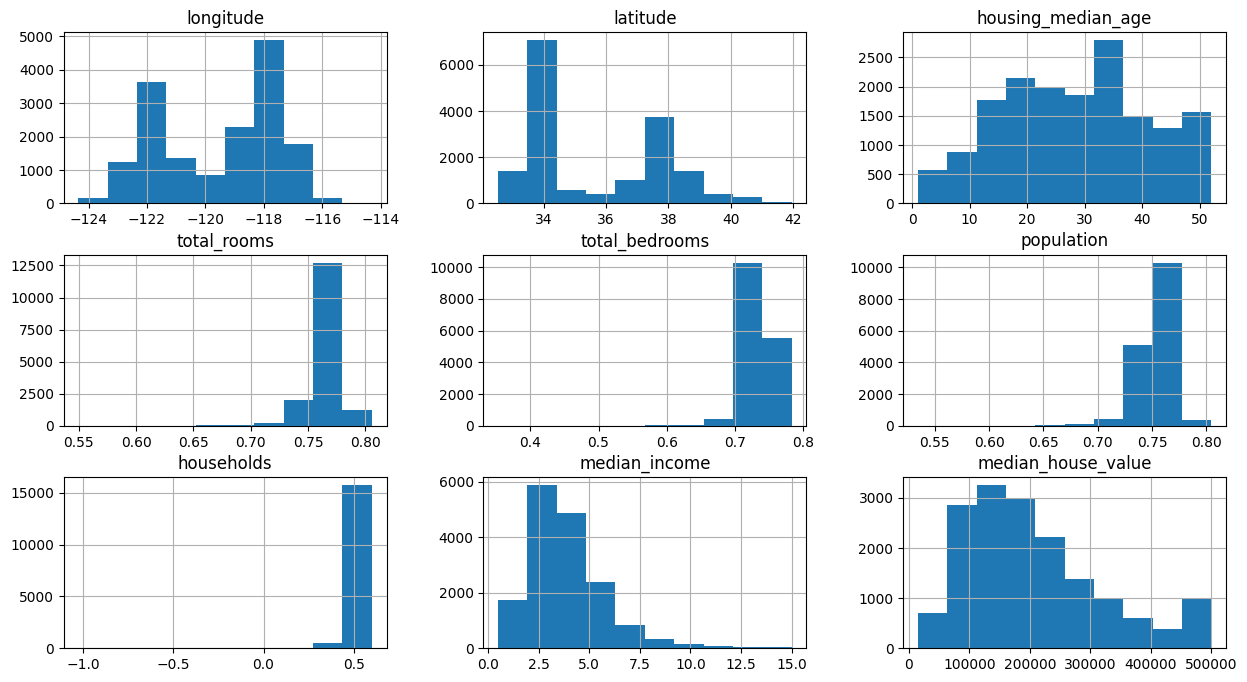

In [54]:
train_data.hist(figsize=(15,8))
#showing the data in a more welcoming graphs

In [58]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7220
INLAND        5231
NEAR OCEAN    2093
NEAR BAY      1798
ISLAND           4
Name: count, dtype: int64

In [60]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis =1)

In [61]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9666,-120.55,41.61,22.0,-0.318669,-0.378865,-0.344059,-1.945069,2.0802,47900.0,False,True,False,False,False
2693,-115.39,32.76,16.0,-0.402211,-0.527368,-0.453799,NaN,6.2558,146300.0,False,True,False,False,False
4777,-118.33,34.03,33.0,-0.368490,-0.436631,-0.381912,NaN,1.7377,183900.0,True,False,False,False,False
14203,-117.05,32.69,8.0,-0.419367,-0.549424,-0.426165,NaN,5.3908,165500.0,False,False,False,False,True
16766,-122.48,37.69,33.0,-0.367883,-0.449539,-0.396911,NaN,3.4492,264300.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,-124.16,40.77,35.0,-0.371862,-0.460363,-0.406226,NaN,2.8529,85600.0,False,False,False,False,True
10547,-117.77,33.71,15.0,-0.372670,-0.490676,-0.405872,NaN,7.3141,337100.0,True,False,False,False,False
580,-122.07,37.71,36.0,-0.359365,-0.453943,-0.397891,NaN,4.9801,241500.0,False,False,False,True,False
3870,-118.46,34.16,26.0,-0.364403,-0.434360,-0.404000,NaN,4.3839,299100.0,True,False,False,False,False


<Axes: >

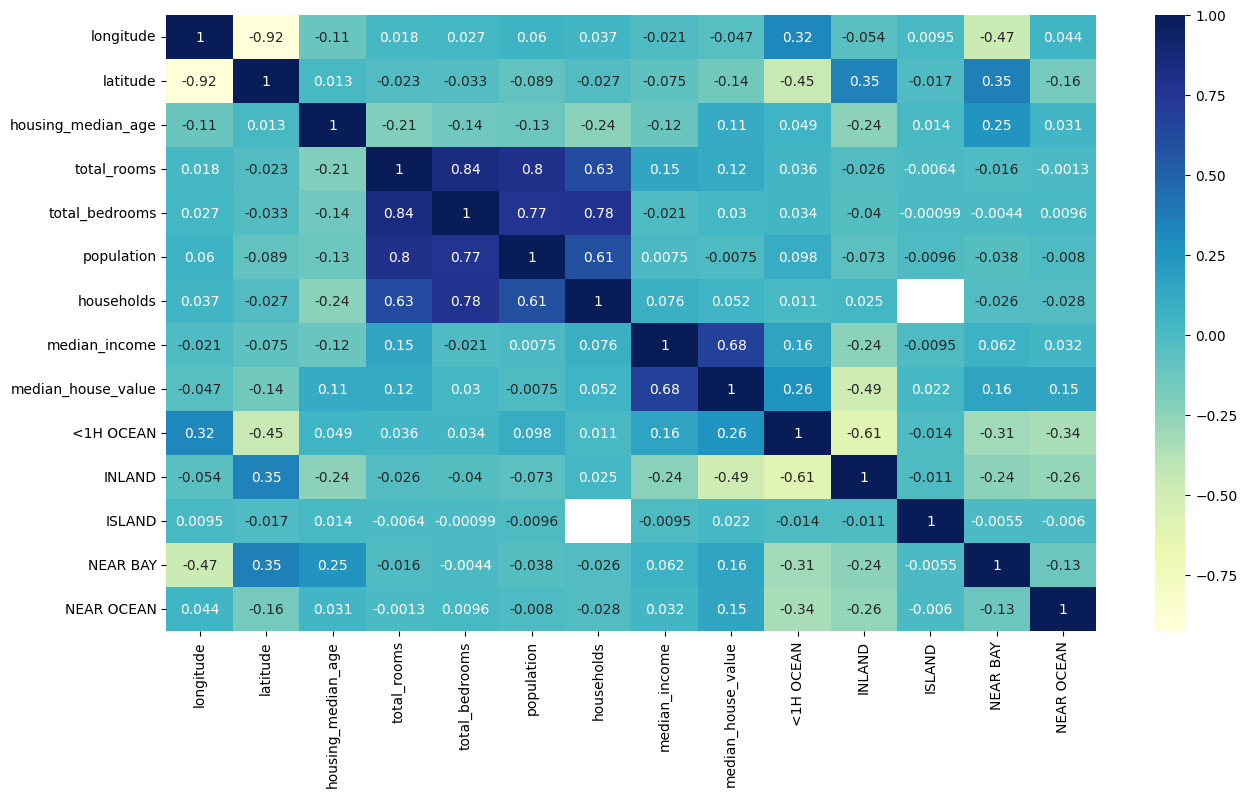

In [63]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

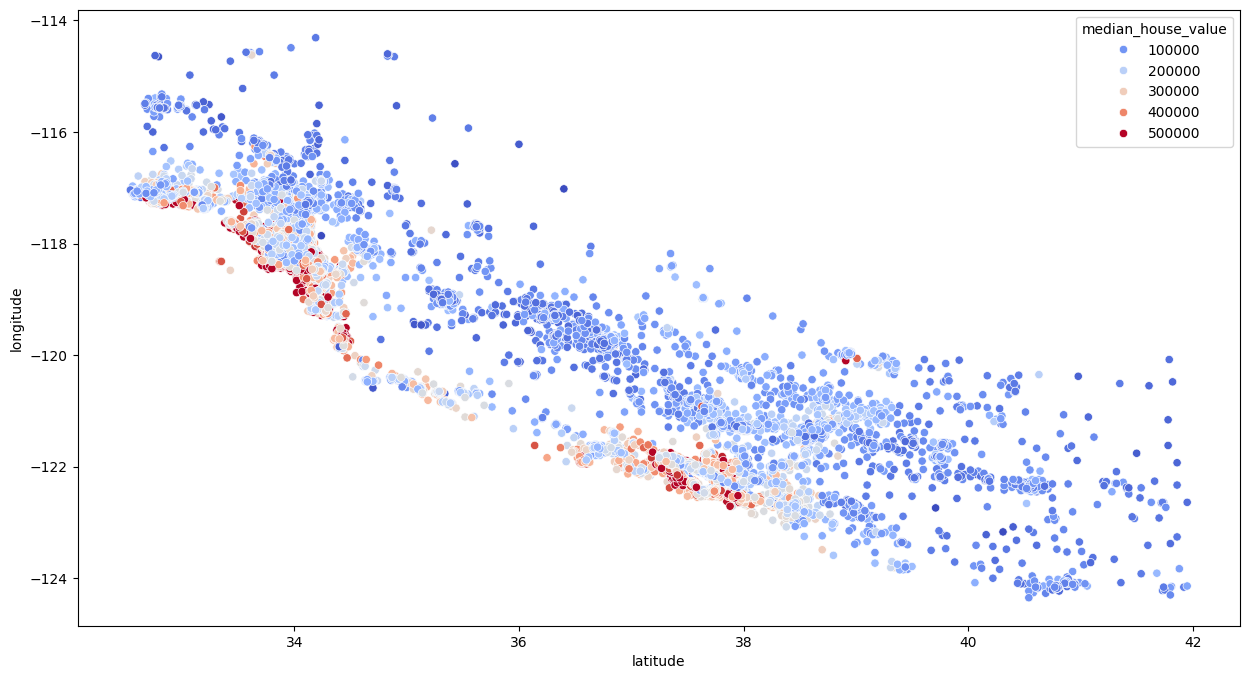

In [64]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")
#inland is up , coast is down on the map of california